In [1]:
import numpy as np
from sklearn.neighbors import NearestNeighbors
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
from ID_tools import *

In [2]:
size1 = 1000
size2 = 50000
accuracy = [0.9]
scale = 0.001

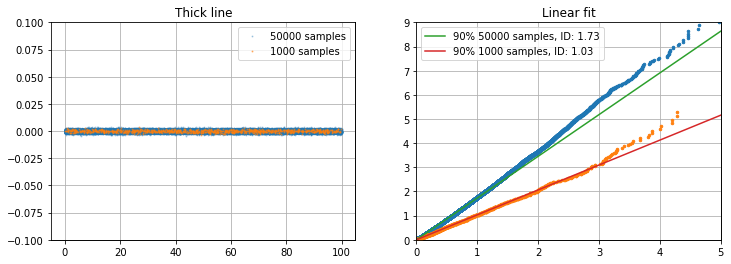

In [33]:
np.random.seed(9)
s1 = np.hstack((np.random.uniform(low=0, high=100,size=size1).reshape(-1,1),\
                np.random.normal(scale=scale,size=size1).reshape(-1,1)))
s2 = np.hstack((np.random.uniform(low=0, high=100,size=size2).reshape(-1,1),\
                np.random.normal(scale=scale,size=size2).reshape(-1,1)))

fig,axn = plt.subplots(1, 2, figsize=(12,4))
plt.setp(axn, xticks=[], yticks=[])
fig.add_subplot(1,2,1)
plt.title('Thick line')
plt.ylim(ymin=-0.1,ymax=0.1)
plt.plot(s2[:,0],s2[:,1], ls='',marker='.', alpha=0.3, ms=2, label=str(size2)+' samples')
plt.plot(s1[:,0],s1[:,1], ls='',marker='.', alpha=0.5, ms=2, label=str(size1)+' samples')
plt.legend()
plt.grid()

fig.add_subplot(1,2,2)
d1, x1, y1 = compute_ID(s1,\
                 accuracy = accuracy, return_x_y = True, benchmark=False, algorithm='kd_tree')
d2, x2, y2 = compute_ID(s2,\
                 accuracy = accuracy, return_x_y = True, benchmark=False, algorithm='kd_tree')

plt.plot(x2,y2,ls=' ', marker='.', alpha=1, ms=5)
plt.plot(x1,y1,ls=' ', marker='.', alpha=1, ms=5)
plt.ylim(ymin=0, ymax=9)
plt.xlim(xmin=0, xmax=5)
plt.title('Linear fit')
p = np.linspace(0,5,100)
plt.plot(p,p*d2[0], label=str(int(accuracy[0]*100))+'% '+str(size2)+' samples, ID: '+"{0:.2f}".format(d2[0]))
plt.plot(p,p*d1[0], label=str(int(accuracy[0]*100))+'% '+str(size1)+' samples, ID: '+"{0:.2f}".format(d1[0]))
plt.legend(loc=0)
plt.grid()

In [34]:
res = []
err = []
samples = [250,500,1000,2000,4000,8000, 16000, 32000]
for n_sample in samples:
    d = []
    for i in range(s2.shape[0]//n_sample):
        d.append(compute_ID(s2[np.random.choice(s2.shape[0], replace=False, size=n_sample)],\
                 accuracy = accuracy, return_x_y = False, benchmark=False, algorithm='kd_tree')[0])
    res.append(np.average(d))
    err.append(np.std(d))

Text(0,0.5,'ID')

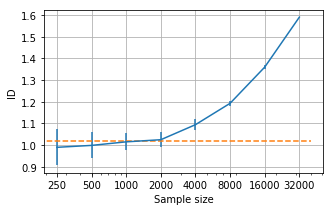

In [39]:
fig = plt.figure(figsize=(5,3))
plt.errorbar(samples, res, yerr=err)
plt.semilogx()
plt.plot([0,40000], [(res[2]+res[3])/2]*2, ls='--')
plt.xticks(samples,['250','500','1000','2000','4000','8000', '16000', '32000'])
plt.grid()
plt.xlabel('Sample size')
plt.ylabel('ID')